# Example Notebook
How to:
- Calculate Galactocentric Position Velocity from Observables
- Calculate Energy, Lz, and Lperp in the potential of Dodd23
- Identify the grouping of the star from its position in IoM space

## Load Test Data
Test data is a small subset of the GaiaDR3 Halo dataset of Dodd23.

In [1]:
import id_Dodd23

In [2]:
import astropy
import numpy as np
from astropy.table import QTable
from id_Dodd23.coordinates import add_units

In [3]:
from id_Dodd23.load_data import test_data_file

In [4]:
astro_tab = QTable.read(test_data_file)
astro_tab = add_units(astro_tab)

In [5]:
astro_tab

distance,ra,dec,pmra,pmdec,radial_velocity,source_id,X,Y,Z,vX,vY,vZ,E,Lz,Lp,derived_labels_group
kpc,deg,deg,mas / yr,mas / yr,km / s,,,,,,,,,,,
float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64
0.6569138064891398,79.6420688518089,-5.462610099708457,55.71285226069336,-1.1000115932088952,-142.52946,3210029424269780736,-8.738054268313546,-0.27476551648877223,-0.25794818172315764,111.87639271763013,204.03663522989842,203.69531788829335,-104050.1082767272,1752.1434165349874,1751.0456106108838,-1
2.269885807020314,270.65102179615553,-22.30647255806272,-18.573493014916664,-18.38000634553325,4.43005,4069868304850700160,-5.95033711495432,0.30231246610285084,0.0023776877478091317,51.45311311648649,-22.586134349687313,83.59451335118452,-166242.90699692926,-118.8401959893751,498.18200597091237,-1
0.7667136477450862,160.8337099559071,-27.298394947954105,-68.14480824049961,0.7046412294251955,218.37772,5457599622881112960,-8.189927642700708,-0.6801550021037177,0.35374784574651924,-196.22185063030534,-11.588446369759652,-6.957078567328125,-135470.12945671787,38.55273596860148,126.69918394663613,-1
2.215840070324138,177.51264225565427,-50.07660418097275,-29.538628404718093,-3.053665662605868,197.23943,5370847536981538432,-7.353744833562512,-1.9988089209235476,0.4456033080761248,-175.53993776792754,-66.87760822516299,-56.63564302838645,-139117.84826967903,-140.93007237791215,514.9598298638659,-1
0.6612475015935336,233.4810224293186,-67.16246141734428,-27.859130542527552,24.90145236945257,183.3861,5823800354314281728,-7.716614780183498,-0.4389350584785546,-0.10451316694594619,141.82164168152315,92.72315156174386,91.28260641860007,-139774.64425843488,653.2583512215433,690.239212586275,-1
0.9564512255383445,93.75780581545092,-15.715473466695368,19.768824304536523,-44.82212138121657,93.34727,2992838906707451520,-8.873786739132546,-0.6320052660612839,-0.24774931013775867,97.80662975543454,21.854817041945694,-19.590345897258516,-145789.11071394364,132.1206805918448,198.86989497797407,-1
0.48716036536666246,112.76254954503833,-68.30994383857458,-5.921732612562819,9.213970052152144,298.55826,5268801209965787136,-8.122172773338574,-0.4464084817094552,-0.17885080886658083,34.17266661632839,-30.68259921136763,-107.73501244583404,-148767.7257783705,-264.46434014998835,882.1836560595557,-1
1.3397906448019974,224.64643312769795,-21.45954995654293,-17.50511410385979,-23.237899106837467,127.98259,6232497549409088128,-7.148822634279215,-0.4146947017103565,0.7197870671723846,77.89417943270735,31.126409606262797,24.683648380413942,-156823.09431064187,190.2148780122779,234.80600959089904,-1


## Coordinate Transform
Observables to Galacto_PosVel

In [6]:
from id_Dodd23.coordinates import coord_transform_icrs_Galacto

In [7]:
observables = ["ra","dec","distance","pmra","pmdec","radial_velocity"]
obs_data = {key:astro_tab[key]for key in observables}

In [8]:
xyz = coord_transform_icrs_Galacto(obs_data)

## Calculate Dynamics
From galacto PosVel to \[En,Lz,Lperp\]

In [9]:
from id_Dodd23.dynamics import dynamics_calc_H99

In [10]:
vec_ELzLp  = dynamics_calc_H99(xyz)

In [11]:
print(vec_ELzLp[:5,:])

[[-1.04055357e+05  1.75197159e+03  1.75090205e+03]
 [-1.66247184e+05 -1.18894200e+02  4.97859265e+02]
 [-1.35472253e+05  3.85148507e+01  1.26764460e+02]
 [-1.39119547e+05 -1.40959540e+02  5.15208246e+02]
 [-1.39778692e+05  6.53153014e+02  6.90187680e+02]]


In [12]:
print(astro_tab[:5][["E","Lz","Lp"]])

         E                   Lz                 Lp        
------------------- ------------------- ------------------
 -104050.1082767272  1752.1434165349874 1751.0456106108838
-166242.90699692926  -118.8401959893751 498.18200597091237
-135470.12945671787   38.55273596860148 126.69918394663613
-139117.84826967903 -140.93007237791215  514.9598298638659
-139774.64425843488   653.2583512215433   690.239212586275


## Identify Groups
Using the position in IoM space, identify stars that are close to known groups

In [13]:
from id_Dodd23.id_stars import  add_maha_members_to_groups

In [14]:
from id_Dodd23.load_data import named_Groups, group_covar,group_mean 

In [15]:
labels = add_maha_members_to_groups(vec_ELzLp,group_mean,group_covar)

In [16]:
original_labels = np.asarray(astro_tab["derived_labels_group"]).astype(int)

In [17]:
(original_labels==labels).all()

True

In [18]:
groups = named_Groups[labels]
groups[labels==-1] = "Other"

In [19]:
for g in named_Groups:
    print(g, (groups==g).sum())

Gaia Enceladus 8
L-RL3 8
Hot Thick Disk 1
Thamnos 1+2 1
Helmi Streams 0
Sequoia 1
ED-1 0
7 0
8 1
9 0
10 0
L-RL64 0
12 0
13 1
14 0
ED-2 0
16 0
ED-4 0
19 0
20 0
21 0
22 0
ED-3 0
Typhon 0
ED-5 1
27 0
ED-6 0


## Plots

In [21]:
import matplotlib.pyplot as plt

78


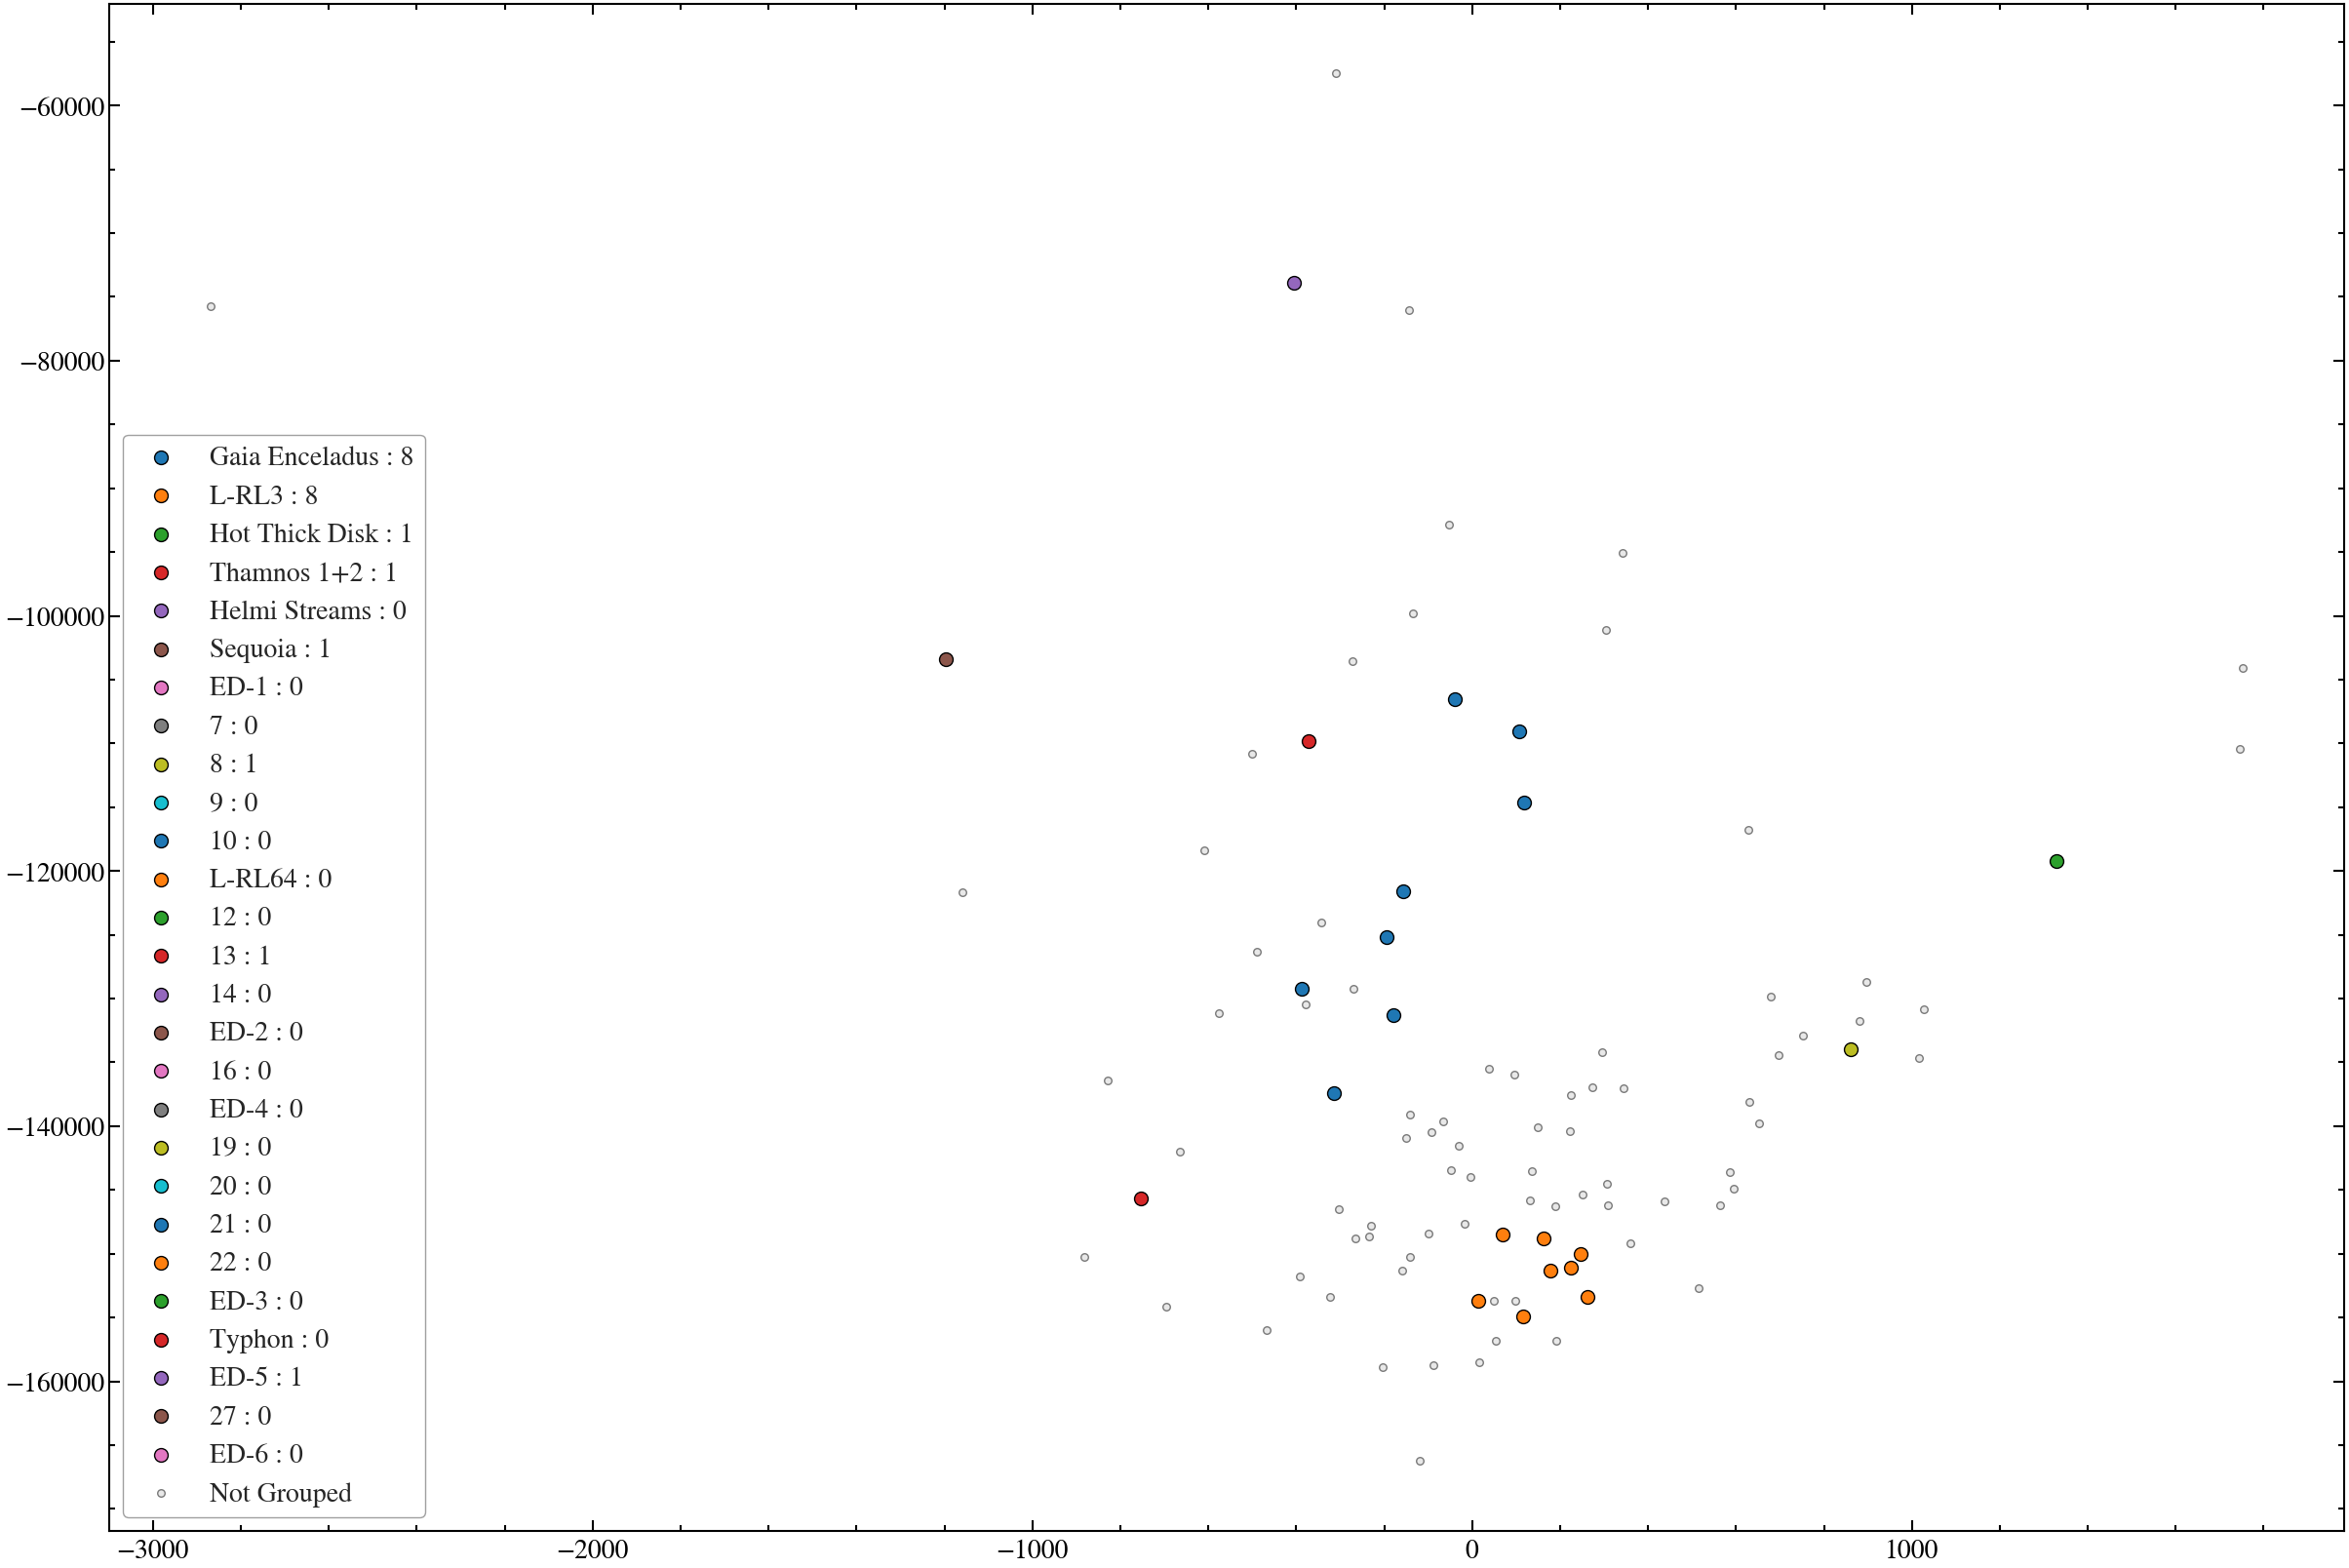

In [27]:
plt.figure()
for g in named_Groups:
    g_filt =(groups==g)
    pop = g_filt.sum()
    plt.scatter( vec_ELzLp[g_filt,1],vec_ELzLp[g_filt,0],label=f"{g} : {pop}")
g_filt = (labels==-1)
print(g_filt.sum())
plt.scatter( vec_ELzLp[g_filt,1],vec_ELzLp[g_filt,0],label="Not Grouped",zorder=-1,c="lightgrey",s=30,alpha=0.5)
plt.legend()
plt.show()